In [1]:
# Import libraries 
import pandas as pd
import numpy as np

In [2]:
# setting difference to be 4.5
df = pd.read_csv("Final_4andhalf.csv")
df.head()

,Unnamed: 0,coil,furnace Number,analyse,Hardness_1,Hardness_2,Width,Temperature before finishing mill,Temperature after finishing mill,Thickness,...,al,ma,b,n,ti,cr,va,mo,difference,constriction
0,0,396378,1,K371,10003,101,1302.1,1147,921,4.36,...,304,291,1,34,6,302,0,25,-0.783333,0
1,1,396376,3,K371,10123,101,1282.3,1150,920,4.37,...,395,384,1,33,12,189,25,7,-0.300000,0
2,2,396377,4,K321,10040,102,1297.4,1183,933,4.43,...,476,463,1,20,11,288,0,40,-1.866667,0
3,3,396379,3,K371,10243,102,1295.2,1165,910,4.44,...,306,296,1,21,9,253,0,9,-0.166667,0
4,4,396380,4,K321,10012,100,1293.3,1192,909,3.95,...,340,329,1,28,8,297,0,23,-0.800000,0


In [19]:
# drop the columns
df = df.drop(['Unnamed: 0','Thickness profile','difference'], axis = 1)

In [20]:
# Checking for null values
df.isnull().sum()

coil                                 0
furnace Number                       0
analyse                              0
Hardness_1                           0
Hardness_2                           0
Width                                0
Temperature before finishing mill    0
Temperature after finishing mill     0
Thickness                            0
c                                    0
mn                                   0
si                                   0
nb                                   0
p                                    0
s                                    0
al                                   0
ma                                   0
b                                    0
n                                    0
ti                                   0
cr                                   0
va                                   0
mo                                   0
constriction                         0
dtype: int64

In [21]:
# dropping the zeros
df = df.loc[df.Hardness_1 * df.Hardness_2 * df.Width * df.Thickness * df['Temperature before finishing mill'] * df['Temperature after finishing mill'] != 0]

In [22]:
df.dtypes

coil                                   int64
furnace Number                         int64
analyse                               object
Hardness_1                             int64
Hardness_2                             int64
Width                                float64
Temperature before finishing mill      int64
Temperature after finishing mill       int64
Thickness                            float64
c                                      int64
mn                                     int64
si                                     int64
nb                                     int64
p                                      int64
s                                      int64
al                                     int64
ma                                     int64
b                                      int64
n                                      int64
ti                                     int64
cr                                     int64
va                                     int64
mo        

In [23]:
#Extracting independent variables
X= df.iloc[:,4:-1]
X.head()

,Hardness_2,Width,Temperature before finishing mill,Temperature after finishing mill,Thickness,c,mn,si,nb,p,s,al,ma,b,n,ti,cr,va,mo
0,101,1302.1,1147,921,4.36,355,2162,49,0,133,143,304,291,1,34,6,302,0,25
1,101,1282.3,1150,920,4.37,551,1985,101,0,118,90,395,384,1,33,12,189,25,7
2,102,1297.4,1183,933,4.43,457,1895,60,0,108,115,476,463,1,20,11,288,0,40
3,102,1295.2,1165,910,4.44,697,2008,69,0,139,98,306,296,1,21,9,253,0,9
4,100,1293.3,1192,909,3.95,477,1936,52,0,112,121,340,329,1,28,8,297,0,23


In [9]:
y= df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: constriction, dtype: int64

# Dealing with imbalanced data

In [32]:
# Downsampling 

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 

In [25]:
#For splitting the dataset, 
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)  

In [26]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X_train,  y_train)
# summarize class distribution
print(Counter(y_over))

Counter({0: 3831, 1: 3831})


# Building the model

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
# define the model
model = RandomForestClassifier(n_estimators = 300, max_depth = 7, random_state =42, class_weight= "balanced_subsample")
model.fit(X_over, y_over)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=7,
                       n_estimators=300, random_state=42)

In [34]:
prediction = model.predict(X_test)
prediction

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
# Checking the feature importance
feature_importances = pd.DataFrame(model.feature_importances_, index =X.columns,  columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(10)

,importance
Thickness,0.211957
mn,0.140332
c,0.081806
si,0.078442
Width,0.074713
nb,0.072095
cr,0.069792
Hardness_2,0.062077
b,0.043101
s,0.041701


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.800


C:\Users\Fidrmuc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


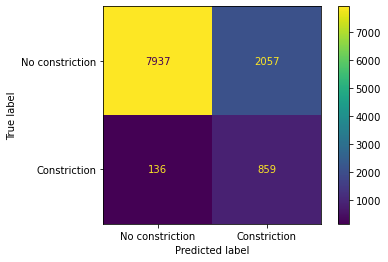

In [36]:
from sklearn import metrics

metrics.plot_confusion_matrix(model, X_test, y_test,display_labels=['No constriction', 'Constriction'],)